In this exercise, we will try to implement linear regression and polynomial regression with the Boston housing price dataset, which we have used as an example during the lecutre. 

First, we would load the datasets together, do some basic data exploration, and split the entire datasets into train and test. 

Then, there are mainly two tasks for you in this excercise:

- Build the linear regression model between 'RM' (average Number of rooms per person) and 'MEDV' (housing prices in 1000s US dollars), and calculate the mean_squared_error in the test dataset.
    
- Build the polynomial regression model between 'LSTAT' (percentage of lower status of the population) and 'MEDV' using different degrees of polynominal function (i.e., x^2, x^3 etc), and calculate the mean_squared_error in the test dataset.

In [1]:
%pip install scikit-learn==1.1.1 -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import operator

#imports from sklearn library
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

#Visualization Libraries
import matplotlib.pyplot as plt


#To plot the graph embedded in the notebook
%matplotlib inline

Load the dataset

In [3]:
# loading the Bouston dataset direclty from sklearn
boston = datasets.load_boston()

Now let us print the attributes,, and check which attributes are available

In [5]:
# Print the python data tpye and size of boston dataset together with the feature_names

print(type(boston))
print('\n')
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n')
print(boston.feature_names)


<class 'sklearn.utils._bunch.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The features can be summarized as follows (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html):

- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town.
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways
- TAX: This is the full-value property-tax rate per 10,000 dollars
- PTRATIO: This is the pupil-teacher ratio by town
- B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
- LSTAT: This is the percentage lower status of the population
- MEDV: This is the median value of owner-occupied homes in 1,000 dollars



In [6]:
# Convert boston data into pandas dataframe 

boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [7]:
# Append the price feature as a colunm from the boston
boston_data['MEDV'] = boston.target
print(boston_data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

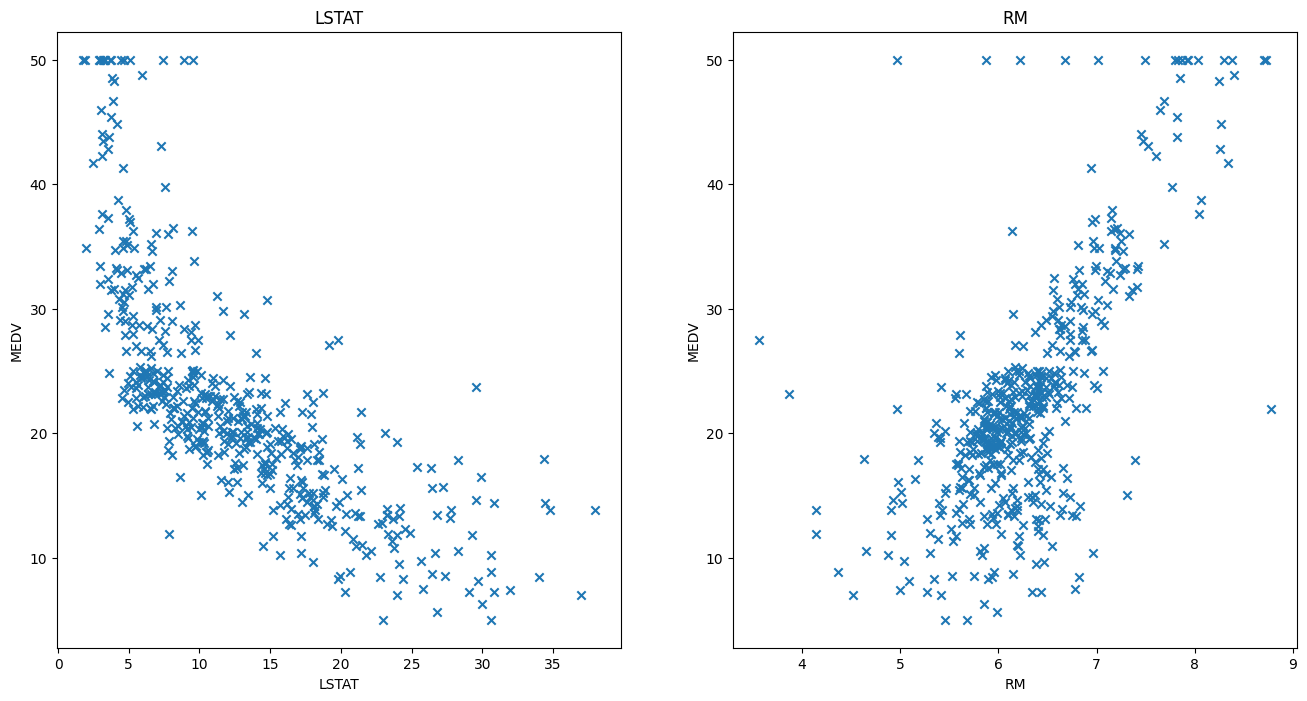

In [8]:
# scatter plot using'RM' and 'LSTAT' as x axis, and 'MEDV' as y axis

plt.figure(figsize=(16, 8))

features = ['LSTAT', 'RM']
target = boston_data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston_data[col]
    y = target
    plt.scatter(x, y, marker='x')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

✏️ Now, it is your turn!
fit a linear regression model:
1. define the split ratio between training and validation data

In [ ]:
# split the boston hoursing dataset into training and validation

# tips: try to remember the default ratio we disucssed in the lecture 
ratio = 0.2 # split ratio

X = boston_data['RM'].values.reshape(-1,1)

Y = boston_data['MEDV']

### BEGIN SOLUTION

### END SOLUTION

In [ ]:
try: 
   assert x_train.shape == (404, 1)
except: 
   print('Element shape of x_train is not correct. shape is not correct')

try: 
   assert y_train.shape == (404,)
except: 
   print('Element shape of y_train is not correct. shape is not correct')


2. print the size of test dataset

In [ ]:
### BEGIN SOLUTION
print(x_test.shape)
print(y_test.shape)
### END SOLUTION

In [ ]:
try: 
   assert x_test.shape == (102, 1)
except: 
   print('Element shape of x_test is not correct. shape is not correct')

try: 
   assert y_test.shape == (102,)
except: 
   print('Element shape of y_test is not correct. shape is not correct')


In [ ]:
# initial a linear regression model
lin_reg = LinearRegression()

# fit a linear regression to linear features.
# tips: for the LinearRegression.fit(x,y) function, herein x will be your input feature and y is the label
lin_reg.fit(x_train, y_train)

# calculate the y_hat from the trained model
y_train_pred = lin_reg.predict(x_train)

3. plot the fitted line

In [ ]:
### BEGIN SOLUTION
# plot the results

### END SOLUTION

In [ ]:
try: 
   assert len(x_train) == len(sorted_zip) == 404

except:  
   print("Incorrcet y_pred. Please check your prediction result again.")


In [ ]:
# tips: calculate the y_hat for the validatiaon set in a similar way.
y_test_predict = lin_reg.predict(x_test)

# model evaluation for validatiaon set
mse = mean_squared_error(y_test, y_test_predict)
print("The model performance for validatiaon set")
print("--------------------------------------")
print('MSE is {}'.format(mse))

✏️Fit a polynomial regression model

In [ ]:
# split the boston hoursing dataset into training and testing 

ratio = 0.2 # split ratio

X = boston_data['LSTAT'].values.reshape(-1,1)

Y = boston_data['MEDV']



1. split the training data and the test data

In [ ]:
### BEGIN SOLUTION
# tips: similar as we did for linear feature
 
### END SOLUTION

In [ ]:
try: 
   assert x_train.shape ==(404, 1) and y_train.shape ==(404,) and x_test.shape == (102, 1) and y_test.shape == (102,)
except: 
   print("The result seems to be different. Try again with correct parameters.") 

In [ ]:
#print the size of train and test dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# this the degree of polynomial feature
poly_degree = 2

# build the polynomial feature space
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
x_train_poly = poly.fit_transform(x_train)

# initial a linear regression model
lin_reg = LinearRegression()

# fit a linear regression to polynomial features.
# tips: now you want to fit the model with the polynomical features you get from the previous step
lin_reg.fit(x_train_poly, y_train)
y_train_poly_pred = lin_reg.predict(x_train_poly)

In [ ]:
# plot the results
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, marker='x')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train,y_train_poly_pred), key=sort_axis)
x_plot, y_poly_pred = zip(*sorted_zip)
# plot the fitted line
plt.plot(x_plot, y_poly_pred, color='red')

2. print the result of residulas (MSE)

In [ ]:
### BEGIN SOLUTION
# model evaluation for testing set
# tips: now do the same polynomial transformation for validation set and calculat the MSE
 
### END SOLUTION

In [ ]:
print("The model performance for validatiaon set")
print("--------------------------------------")
print(mse)

In [ ]:
try: 
   assert  20 <= mse <= 29
except: 
   print("The result seems to be different. Try again with correct parameters.") 


Well Done! Now you know how to train a linear regression model!

✏️ How about a exponential feature space?

In [ ]:
# split the boston hoursing dataset into training and testing 

ratio = 0.2 # split ratio

X = boston_data['LSTAT']

Y = boston_data['MEDV']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

# print the size of train and test dataset

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
def func_exp(x, a, b, c):
        #c = 0
        return a * np.exp(b * x) + c

def exponential_regression(x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.01, 0))
    print(popt)
    plt.figure(figsize=(8, 8))
    puntos = plt.plot(x_data, y_data, 'x', label = "data")
    # tips: create exponential feature sapce using the aforedefined two functions: def func_exp and def exponential_regression
    y_exp_pred = func_exp(x_data, *popt)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x_data,y_exp_pred), key=sort_axis)
    x_data, y_exp_pred = zip(*sorted_zip)
    curva_regresion = plt.plot(x_data, y_exp_pred , color='red')
    plt.legend()
    plt.show()

1. apply the regression function to the data 

In [ ]:
### BEGIN SOLUTION
# tips: then fit a exponential regression model
 
### END SOLUTION

In [ ]:
try: 
   assert x_train.shape == y_train.shape == (404,) and x_test.shape == y_test.shape == (102,)
except: 
   print("Incorrect usage of exponential_regression function")
